In [ ]:
import sys
import os
if os.getcwd().endswith('notebooks'):
    os.chdir("..")
print(os.getcwd())
from importlib import reload

## Imports

In [226]:
import pandas as pd
import numpy as np
from datetime import datetime
import re

import matplotlib.pyplot as plt
from tqdm import tqdm
import librosa
import librosa.display
from scipy.io import wavfile as wav
import IPython.display as ipd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

import detect_who_is_talking.data_preparation as dp
import detect_who_is_talking.model_creation as mc

# Data 

## Steps 1, 2, 3 are not necessary if you already have all your data

### 1 - Split a long audio file into shorter audio files

In [ ]:
reload(dp)
# dp.split_audio_into_files(
#     long_audio_path=os.path.join('data','podcast_4.wav'), 
#     short_audios_folder=os.path.join('data', 'Bill_Burr'), 
#     sec_per_split=4
# )

### 2 - Get audio features from folder of little audio files

In [22]:
reload(dp)
# new_df = dp.create_df_from_audio_split_files(
#     os.path.join('data', 'Bill_Burr'), 
#     class_='Bill Burr',
#     save_csv_path=os.path.join('data', 'train_data_audio_classification.csv') # Put None if you don't want it saved
# )

### 3 - Add the new audio features df with the previous data

In [ ]:
reload(dp)
# save_to_csv = False # True will change the current csv file. False will just append the results in the returned df
# current_csv_path = os.path.join("data", "train_data_audio_classification.csv")
# # +++++++++++++++++++++++++++++++
# df = dp.append_new_data_to_df(new_df, current_csv_path, save_to_csv=save_to_csv)

## Import the data

In [227]:
reload(dp)
csv_path = os.path.join('data', 'train_data_audio_classification.csv')
df = pd.read_csv(csv_path).sample(frac=1).reset_index(drop=True)
df['feature'] = df['feature'].map(lambda x: dp.prepare_df_for_model(str(x)))
df

,feature,class
0,"[-428.44943, 61.28331, -13.388204, 28.133289, ...",Bill Burr
1,"[-332.08185, 53.053333, -31.89226, 20.272032, ...",Sofia Franklyn
2,"[-226.528946, 108.524574, -14.0278406, 33.5226...",Andrew Santino
3,"[-228.74883, 102.53143, -41.949703, 12.735388,...",Sofia Franklyn
4,"[-305.48615, 53.245937, -13.382996, 20.849733,...",Sarah Silverman
...,...,...
1967,"[-278.78519, 91.521088, -19.333652, 23.248035,...",Sofia Franklyn
1968,"[-360.3237, 85.493065, 7.537683, 15.740911, -1...",Sarah Silverman
1969,"[-286.35086, 61.587753, -24.41777, 8.0570307, ...",Sofia Franklyn
1970,"[-257.464111, 78.1685181, -39.5167961, 7.15482...",Sofia Franklyn


In [228]:
df['class'].value_counts()

Andrew Santino     506
Bill Burr          491
Sofia Franklyn     490
Sarah Silverman    485
Name: class, dtype: int64

### Optional: If the classes are crazy unbalanced we can remove some rows of a class that has too many

In [ ]:
# Say we want to remove 600 rows of Andrew Santino Class we can do this
class_to_drop = 'Andrew Santino'
n_rows_to_drop = 600
#+++++++++++++++++++++++++++++
# indexes_to_drop = list(df[df['class']==class_to_drop].sample(n=n_rows_to_drop).index)
# df = df.drop(index=indexes_to_drop).reset_index(drop=True)
# print(df.shape)
# Check if the classes are more balanced now
# df['class'].value_counts()

## Train Test Split

In [232]:
reload(mc)
X_train, X_test, y_train, y_test, labelencoder = mc.encode_and_train_test_split(df, save_encoder=False)

# Model

## Create the model

In [235]:
reload(mc)
model = mc.create_model(y_train)

## Train the model

In [236]:
reload(mc)
model = mc.compile_and_train_model(
    model,
    X_train,
    y_train,
    X_test,
    y_test,
    num_epochs=100,
    num_batch_size=32,
    save_model=False,
)

Epoch 1/100
50/50 [==============================] - 3s 11ms/step - loss: 26.8306 - accuracy: 0.2435 - val_loss: 1.7324 - val_accuracy: 0.4759
Epoch 2/100
50/50 [==============================] - 0s 6ms/step - loss: 8.9621 - accuracy: 0.2562 - val_loss: 1.4369 - val_accuracy: 0.2278
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 4.3908 - accuracy: 0.2784 - val_loss: 1.3808 - val_accuracy: 0.2025
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 2.8455 - accuracy: 0.2993 - val_loss: 1.3881 - val_accuracy: 0.2759
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 2.2510 - accuracy: 0.2784 - val_loss: 1.3818 - val_accuracy: 0.3215
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 1.8432 - accuracy: 0.3126 - val_loss: 1.3811 - val_accuracy: 0.3241
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 1.6493 - accuracy: 0.3304 - val_loss: 1.3669 - val_accuracy: 0.4278
Epoch 8/100

Epoch 59/100
50/50 [==============================] - 0s 6ms/step - loss: 0.1293 - accuracy: 0.9626 - val_loss: 0.0744 - val_accuracy: 0.9722
Epoch 60/100
50/50 [==============================] - 0s 6ms/step - loss: 0.1581 - accuracy: 0.9569 - val_loss: 0.0894 - val_accuracy: 0.9671
Epoch 61/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1261 - accuracy: 0.9670 - val_loss: 0.0751 - val_accuracy: 0.9772
Epoch 62/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1581 - accuracy: 0.9524 - val_loss: 0.0890 - val_accuracy: 0.9696
Epoch 63/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1337 - accuracy: 0.9543 - val_loss: 0.0664 - val_accuracy: 0.9823
Epoch 64/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1560 - accuracy: 0.9575 - val_loss: 0.0720 - val_accuracy: 0.9797
Epoch 65/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1165 - accuracy: 0.9645 - val_loss: 0.0678 - val_accuracy: 0.9797
Epoch 

## View model accuracy

In [237]:
reload(mc)
mc.get_model_accuracy(model, X_test, y_test)

0.9848101139068604

In [ ]:
# If interested, we can view what the model predicted for X_test
predict_x = model.predict(X_test) 
classes_x = np.argmax(predict_x, axis=1)
test_predictions = labelencoder.inverse_transform(classes_x)
print(test_predictions)

# Testing

## View the prediction of 1 specific audio file

In [248]:
# Which file do we want to predict?
filename = os.path.join('data', 'test_audios', '3012_BillBurr2.wav')
ipd.Audio(filename)

In [249]:
prediction = mc.predict_single_audio_file(filename, model, labelencoder)
print(f'Prediction is: {prediction}')

Prediction is: Bill Burr


### For fun we can view what the audio looks like

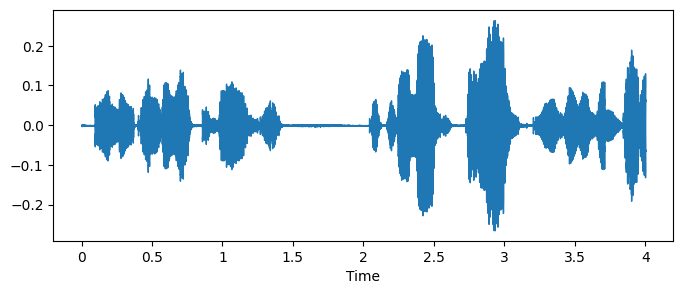

In [250]:
data, sample_rate = librosa.load(filename)
plt.figure(figsize=(8, 3))
librosa.display.waveshow(data, sr=sample_rate)